In [1]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data

In [3]:
Employee = pd.read_csv(r"C:\Users\siddh\OneDrive\Desktop\Machine Learning\WA_Fn-UseC_-HR-Employee-Attrition.csv")
Employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
Employee_original=Employee.copy() 


In [5]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
Employee.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
Employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
Employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
Employee.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
Employee.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [11]:
Employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
Employee.shape

(1470, 35)

# Exploratory Data Analysis

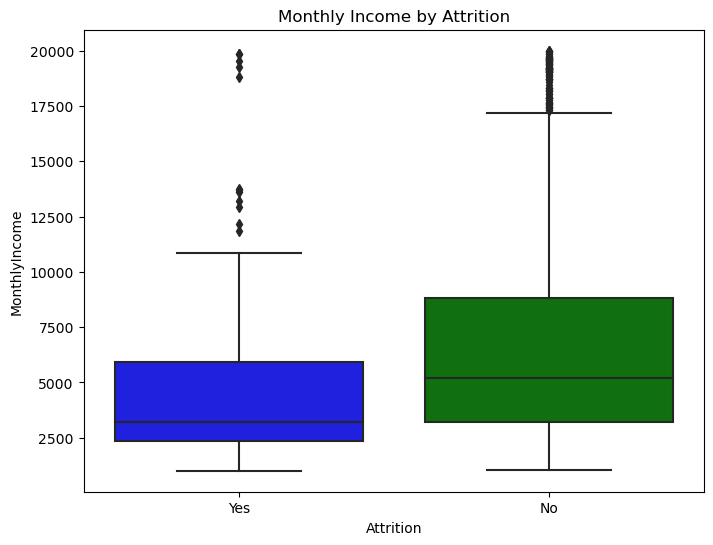

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=Employee, palette={'Yes': 'blue', 'No': 'green'})
plt.title('Monthly Income by Attrition')
plt.show()

The code generates a box plot to visualize the distribution of monthly income based on employee attrition, with 'Yes' represented in blue and 'No' in green.

Independent Variable (Categorical)

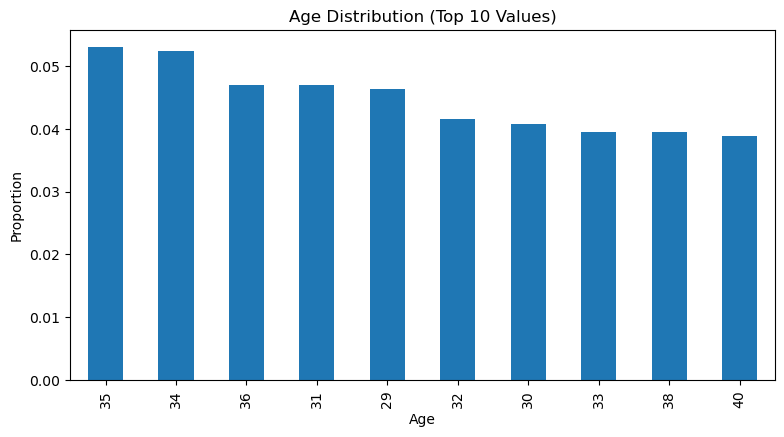

In [14]:
top_10_ages = Employee['Age'].value_counts(normalize=True).head(10)
plt.figure(1)
plt.subplot(221)
top_10_ages.plot.bar(
    figsize=(20, 10), 
    title='Age Distribution (Top 10 Values)'
)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()



The code creates a bar chart showing the proportional distribution of the top 10 most common employee ages using normalized frequencies. It customizes the visualization with a title and axis labels, then displays it in a large figure.

<Axes: title={'center': 'Department'}>

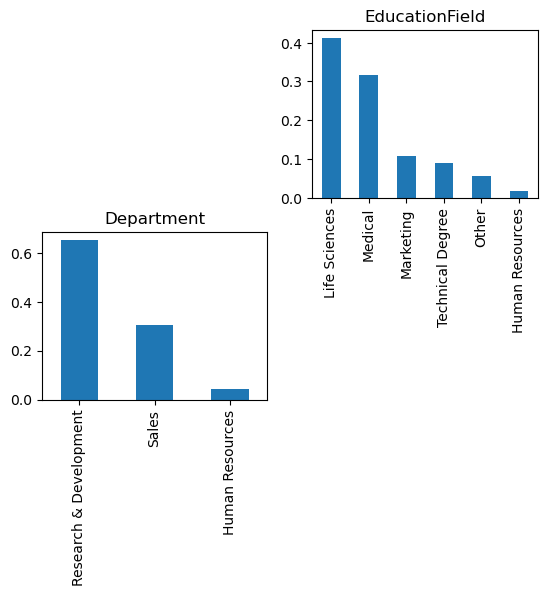

In [15]:
plt.subplot(222) 
Employee['EducationField'].value_counts(normalize=True).plot.bar(title= 'EducationField') 

plt.subplot(223) 
Employee['Department'].value_counts(normalize=True).plot.bar(title= 'Department') 



The code creates two bar charts displaying the proportional distribution of employees by education field and department, using normalized frequencies. Each chart is titled appropriately and positioned within the figure using subplots.

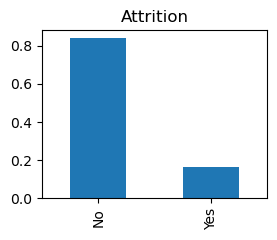

In [16]:
plt.subplot(224) 
Employee['Attrition'].value_counts(normalize=True).plot.bar(title= 'Attrition') 

plt.show()

The code creates a bar chart showing the proportional distribution of employee attrition (e.g., "Yes" or "No") using normalized frequencies. It is displayed in the fourth subplot with a title "Attrition".

Independent Variable (Ordinal)

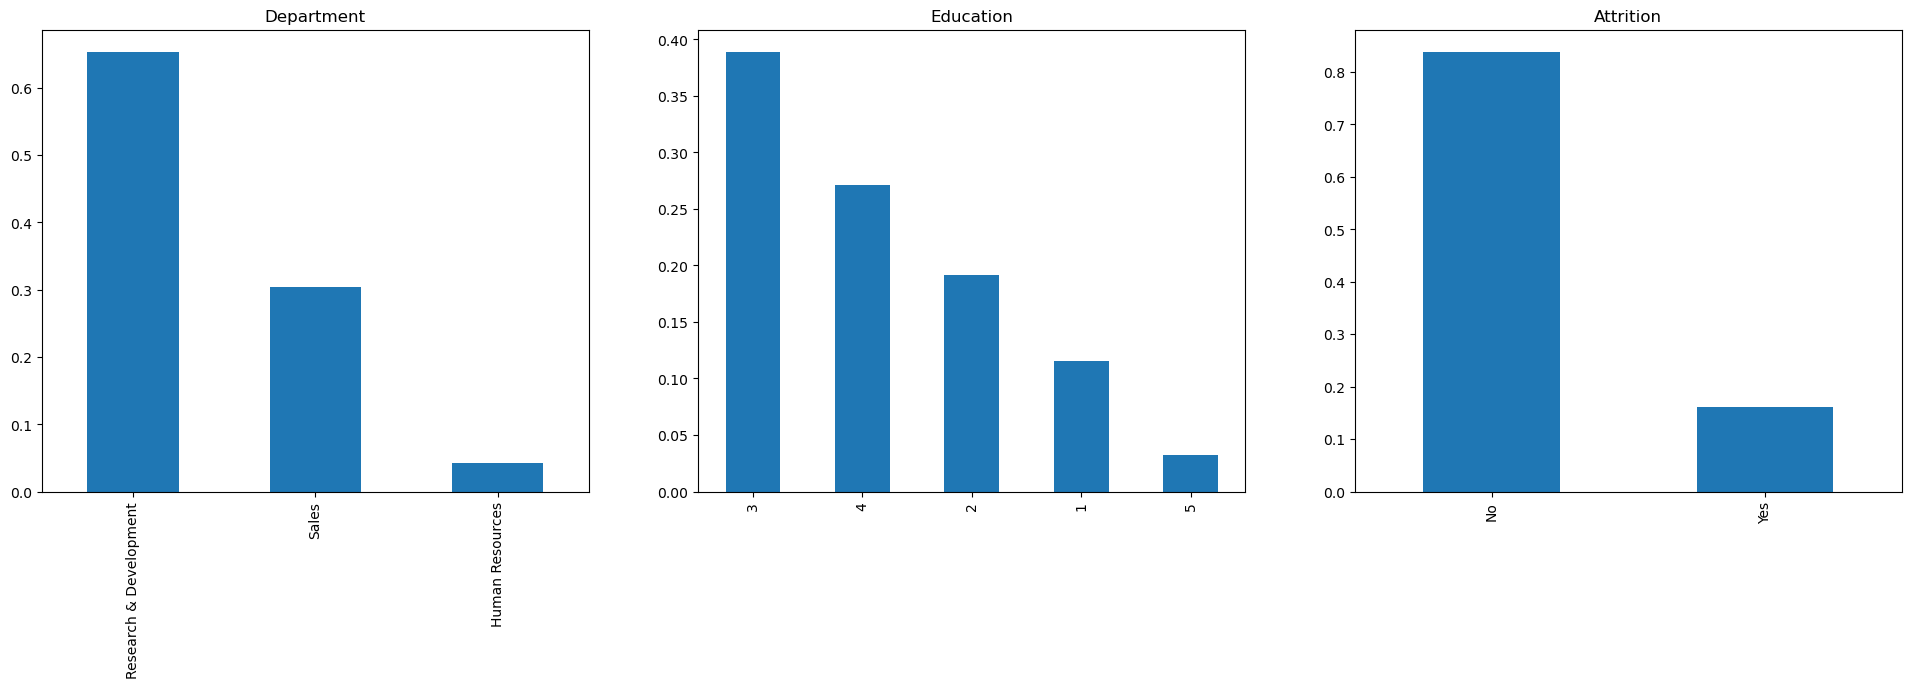

In [17]:
plt.figure(1) 
plt.subplot(131) 
Employee['Department'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Department') 

plt.subplot(132) 
Employee['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133) 
Employee['Attrition'].value_counts(normalize=True).plot.bar(title= 'Attrition') 

plt.show()

The code generates a figure with three bar charts side by side, showing the proportional distributions of employees by department, education level, and attrition. Each chart is titled appropriately, and the figure size is set to 24x6.

C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\3038515727.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Employee['MonthlyIncome']);


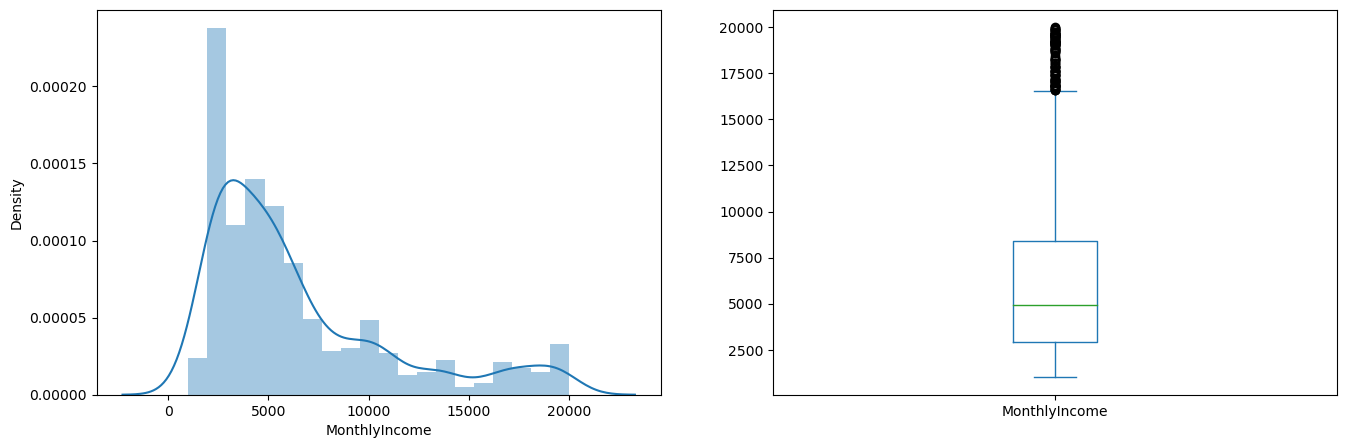

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(Employee['MonthlyIncome']); 
plt.subplot(122) 
Employee['MonthlyIncome'].plot.box(figsize=(16,5)) 
plt.show()

The code creates two visualizations for the MonthlyIncome column: a distribution plot to show its frequency distribution and a box plot to display its statistical summary and detect outliers. Both plots are displayed side by side in a figure sized 16x5.

Text(0.5, 0.98, '')

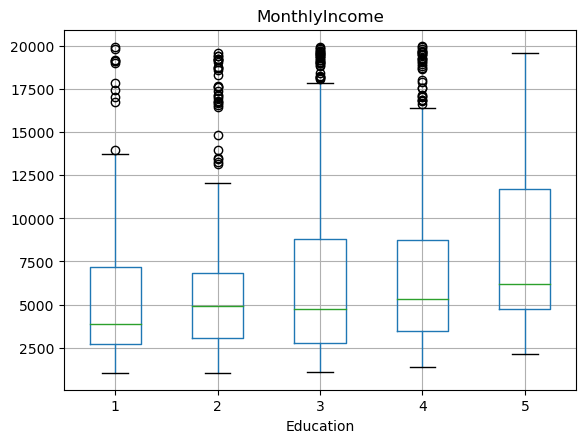

In [19]:
Employee.boxplot(column='MonthlyIncome', by = 'Education') 
plt.suptitle("")

The code generates a box plot comparing the distribution of MonthlyIncome across different Education levels in the Employee dataset. The plt.suptitle("") removes the default title generated by the boxplot function.

C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\1016839386.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Employee['MonthlyRate']);


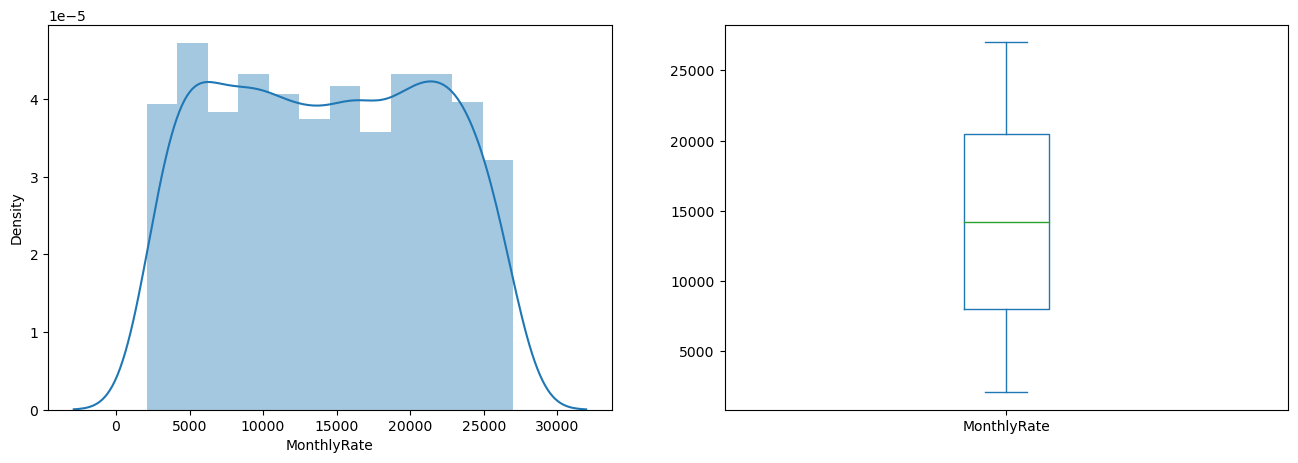

In [20]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(Employee['MonthlyRate']); 
plt.subplot(122) 
Employee['MonthlyRate'].plot.box(figsize=(16,5)) 
plt.show()

The code creates two visualizations for the MonthlyRate column: a distribution plot to show its frequency distribution and a box plot to display its statistical summary and identify outliers. Both plots are displayed side by side in a figure sized 16x5.

C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\1803187444.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


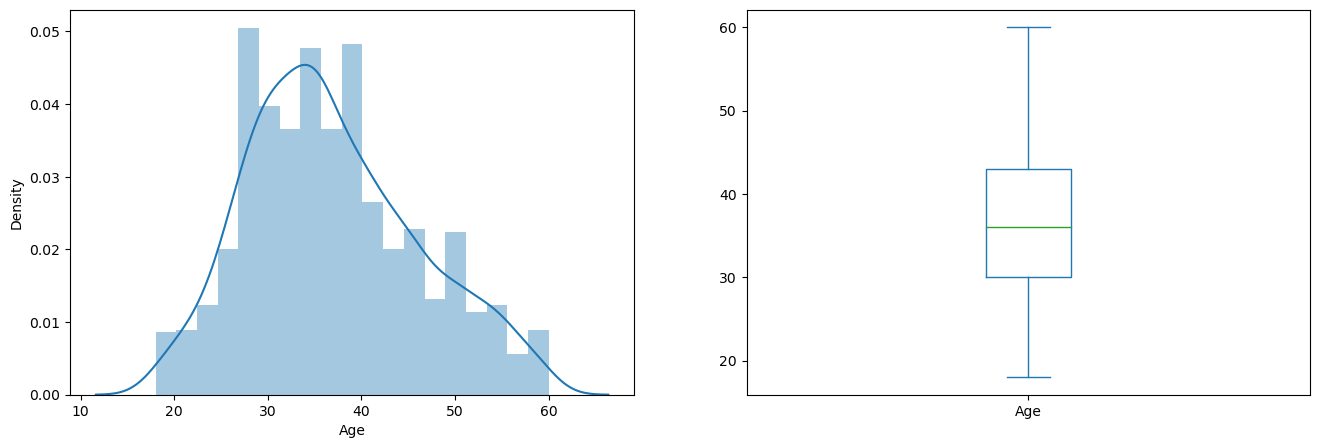

In [21]:
plt.figure(1) 
plt.subplot(121) 
df=Employee.dropna() 
sns.distplot(df['Age']); 
plt.subplot(122) 
Employee['Age'].plot.box(figsize=(16,5)) 
plt.show()

The code visualizes the Age column from the Employee dataset: a distribution plot for the age frequencies after dropping missing values and a box plot for its statistical summary and outlier detection. Both plots are displayed side by side in a figure sized 16x5.

Text(0.5, 0.98, '')

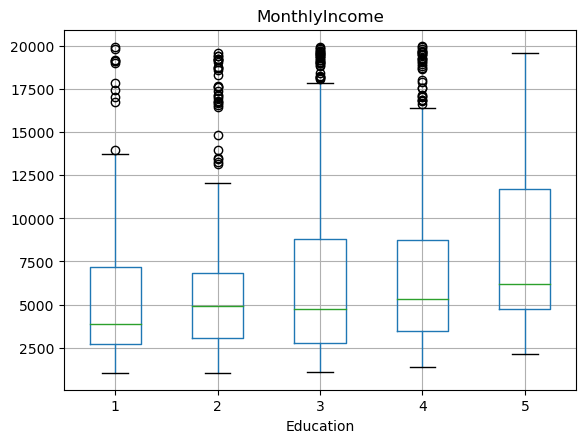

In [22]:
Employee.boxplot(column='MonthlyIncome', by = 'Education') 
plt.suptitle("")

This code generates a box plot to compare the distribution of MonthlyIncome across different levels of Education in the Employee dataset. The plt.suptitle("") removes the default subplot title for a cleaner presentation.

C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\4075851067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Employee['PercentSalaryHike']);


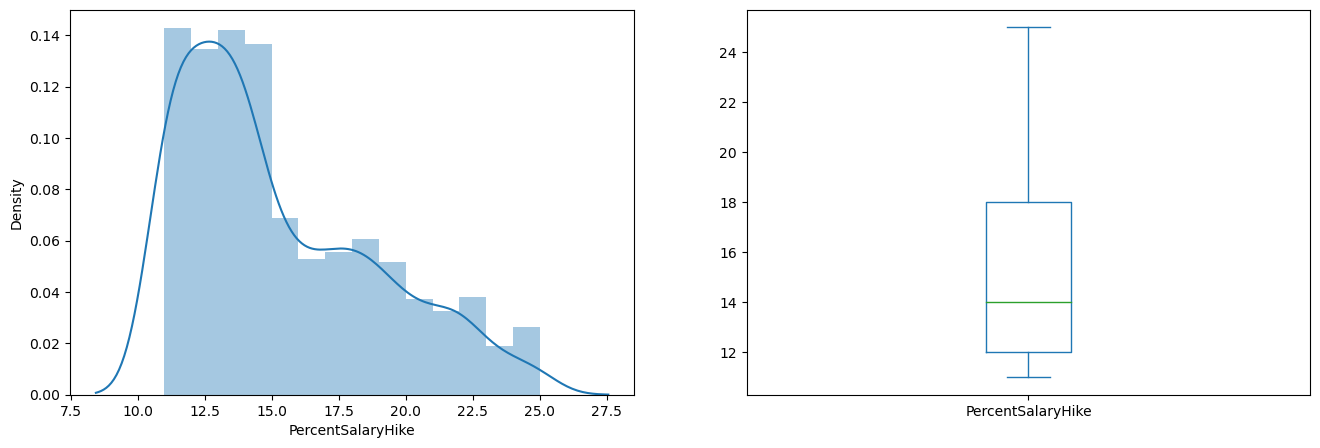

In [23]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(Employee['PercentSalaryHike']); 
plt.subplot(122) 
Employee['PercentSalaryHike'].plot.box(figsize=(16,5)) 
plt.show()

The code creates two visualizations for the PercentSalaryHike column: a distribution plot to show its frequency distribution and a box plot to display its statistical summary and detect outliers. Both plots are displayed side by side in a figure sized 16x5.

C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\3522519451.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DailyRate']);


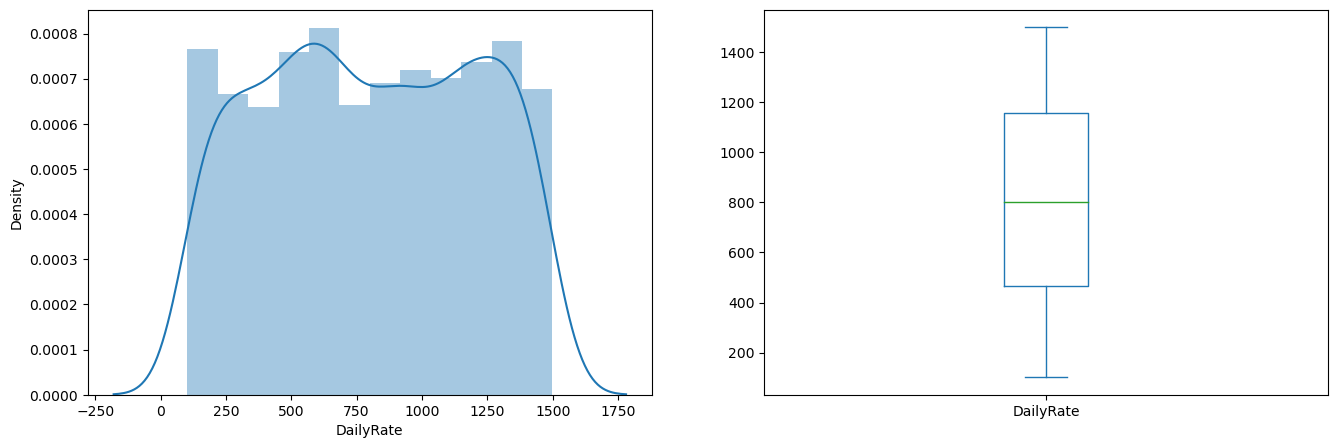

In [24]:
plt.figure(1) 
plt.subplot(121) 
df=Employee.dropna() 
sns.distplot(df['DailyRate']); 
plt.subplot(122) 
Employee['DailyRate'].plot.box(figsize=(16,5)) 
plt.show()

The code visualizes the DailyRate column from the Employee dataset: a distribution plot for the DailyRate values after dropping missing values, and a box plot for its statistical summary and outlier detection. Both plots are displayed side by side in a figure sized 16x5.

# #Categorical Independent Variable v/s Target Variable

<Axes: xlabel='Gender'>

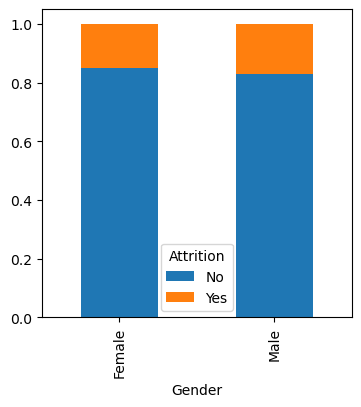

In [25]:
Gender=pd.crosstab(Employee['Gender'],Employee['Attrition']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

The code creates a stacked bar chart to visualize the relationship between Gender and Attrition in the Employee dataset. It uses pd.crosstab to calculate the frequency distribution and normalizes the values by dividing each row by its sum. The result is displayed in a 4x4 figure, showing the proportion of attrition for each gender.

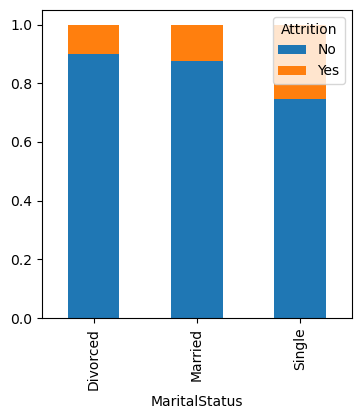

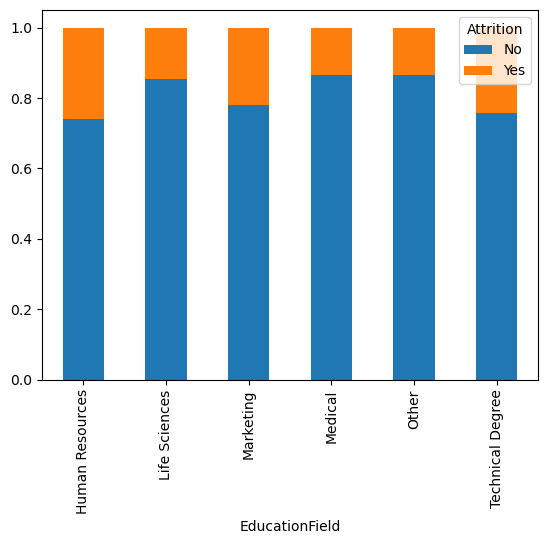

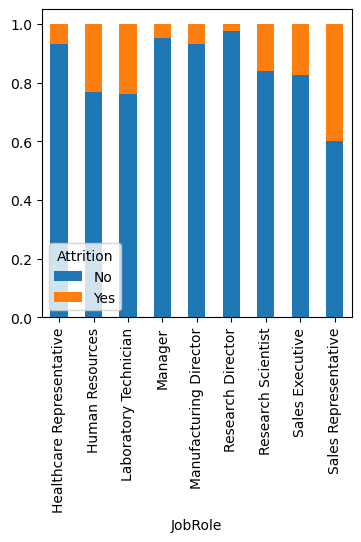

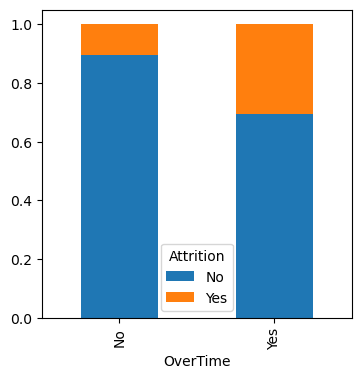

In [26]:
MaritalStatus=pd.crosstab(Employee['MaritalStatus'],Employee['Attrition']) 
EducationField=pd.crosstab(Employee['EducationField'],Employee['Attrition']) 
JobRole=pd.crosstab(Employee['JobRole'],Employee['Attrition']) 
OverTime=pd.crosstab(Employee['OverTime'],Employee['Attrition'])

MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
EducationField.div(EducationField.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
JobRole.div(JobRole.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
OverTime.div(OverTime.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

The code generates four stacked bar charts to visualize the relationship between various employee attributes (MaritalStatus, EducationField, JobRole, OverTime) and Attrition. For each attribute, a cross-tabulation (pd.crosstab) is created to calculate the frequency distribution, normalized by dividing each row by its sum. 

<Axes: xlabel='Attrition'>

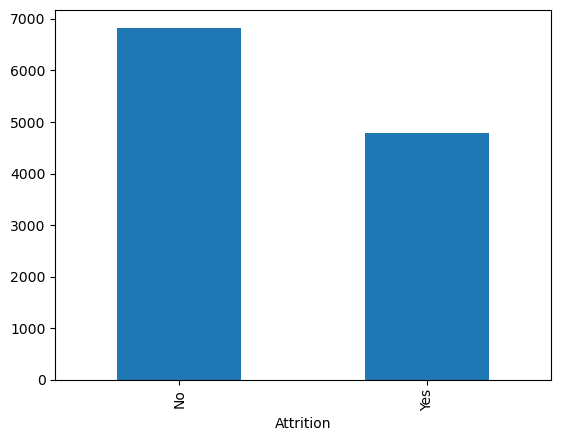

In [27]:
Employee.groupby('Attrition')['MonthlyIncome'].mean().plot.bar()

The code calculates the average MonthlyIncome for employees grouped by their Attrition status (e.g., "Yes" or "No") and then visualizes the result using a bar chart. This chart displays the mean monthly income for each attrition category.

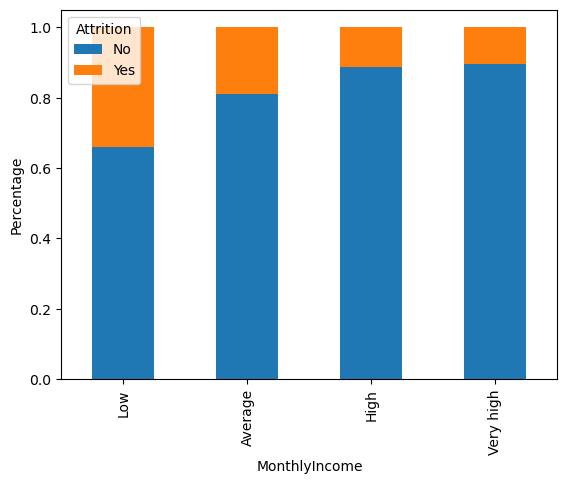

In [28]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
Employee['Income_bin']=pd.cut(df['MonthlyIncome'],bins,labels=group)
Income_bin=pd.crosstab(Employee['Income_bin'],Employee['Attrition']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('MonthlyIncome') 
P = plt.ylabel('Percentage')

The code categorizes MonthlyIncome into bins and calculates the proportional distribution of attrition across income categories. It then plots a stacked bar chart to visualize the percentage of attrition within each income bin.

In [29]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
Employee['Income_bin'] = pd.cut(Employee['MonthlyIncome'], bins, labels=group)


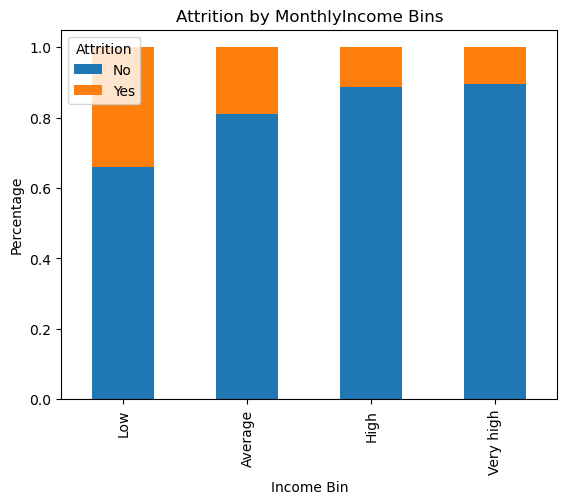

In [30]:
Income_bin_normalized = Income_bin.div(Income_bin.sum(1).astype(float), axis=0)
Income_bin_normalized.plot(kind="bar", stacked=True)
plt.xlabel('Income Bin')
plt.ylabel('Percentage')
plt.title('Attrition by MonthlyIncome Bins')
plt.show()


The code divides MonthlyIncome into three categories (Low, Average, and High) using specified income bins. It then normalizes the data and plots a stacked bar chart to show the percentage of attrition across each income bin, with labeled axes and a title.

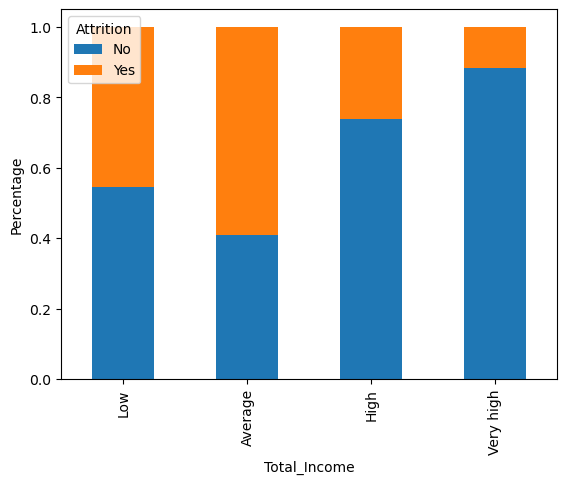

In [31]:
Employee['Total_Income']=Employee['MonthlyIncome']+Employee['MonthlyIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
Employee['Total_Income_bin']=pd.cut(Employee['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(Employee['Total_Income_bin'],Employee['Attrition'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

The code calculates Total_Income by doubling the MonthlyIncome, then categorizes it into bins (Low, Average, High, and Very high). It creates a cross-tabulation between Total_Income_bin and Attrition, normalizes the values, and plots a stacked bar chart to visualize the percentage of attrition within each total income bin, with labeled axes.

In [32]:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']  
Employee = Employee.drop(columns=columns_to_drop, axis=1)
Employee['Department'].replace('3+', 3, inplace=True)
Employee['Attrition'].replace('Yes', 1, inplace=True)
Employee['Attrition'].replace('No', 0, inplace=True)


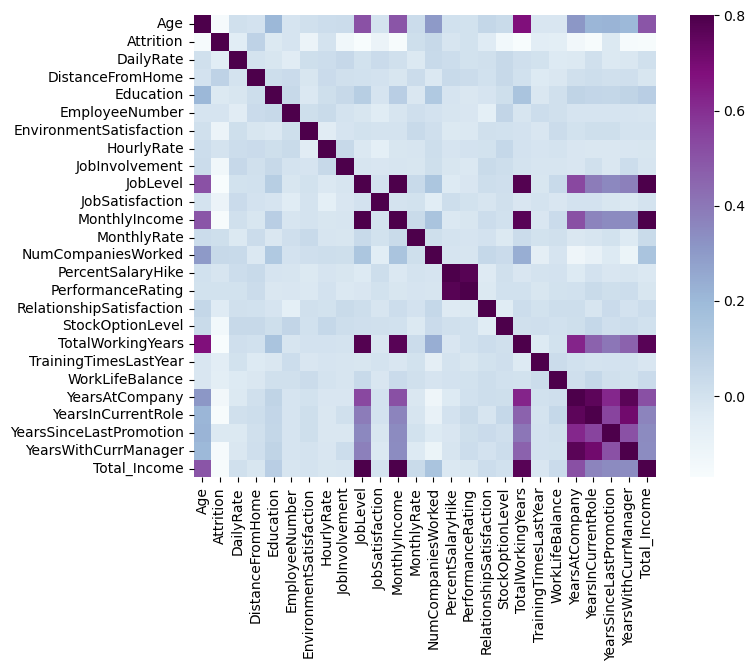

In [33]:
matrix = Employee.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

The code drops irrelevant columns, replaces specific values in Department and Attrition, and calculates the correlation matrix for numerical columns. It then visualizes the correlation matrix using a heatmap with the BuPu color map.

Missing value imputation

In [34]:
Employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Income_bin                  0
Total_Inco

In [35]:
Employee['Gender'].fillna(Employee['Gender'].mode()[0], inplace=True) 
Employee['MaritalStatus'].fillna(Employee['MaritalStatus'].mode()[0], inplace=True) 
Employee['NumCompaniesWorked'].fillna(Employee['NumCompaniesWorked'].mode()[0], inplace=True) 
Employee['OverTime'].fillna(Employee['OverTime'].mode()[0], inplace=True) 
Employee['Attrition'].fillna(Employee['Attrition'].mode()[0], inplace=True)

In [36]:
Employee['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [37]:
Employee['JobRole'].fillna(Employee['JobRole'].mode()[0], inplace=True)

In [38]:
Employee['MonthlyIncome'].fillna(Employee['MonthlyIncome'].median(), inplace=True)

In [39]:
Employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Income_bin                  0
Total_Inco

In [40]:
Employee['Gender'].fillna(Employee['Gender'].mode()[0], inplace=True) 
Employee['Department'].fillna(Employee['Department'].mode()[0], inplace=True) 
Employee['MaritalStatus'].fillna(Employee['MaritalStatus'].mode()[0], inplace=True) 
Employee['NumCompaniesWorked'].fillna(Employee['NumCompaniesWorked'].mode()[0], inplace=True) 
Employee['JobRole'].fillna(Employee['JobRole'].mode()[0], inplace=True) 
Employee['MonthlyIncome'].fillna(Employee['MonthlyIncome'].median(), inplace=True)

Outlier Treatment

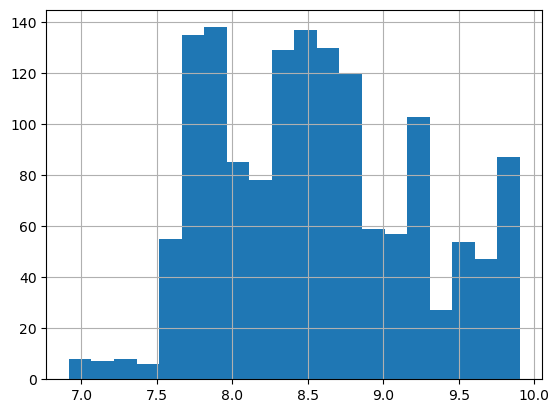

In [41]:
Employee['MonthlyIncome_log'] = np.log(Employee['MonthlyIncome']) 
Employee['MonthlyIncome_log'].hist(bins=20) 
Employee['MonthlyIncome_log'] = np.log(Employee['MonthlyIncome'])

The code applies a logarithmic transformation to the MonthlyIncome column of the Employee dataset and stores it in a new column, MonthlyIncome_log. It then creates a histogram with 20 bins to visualize the distribution of the transformed income data.

Evaluation Metric

KNN

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [144]:
Employee = pd.read_csv(r"C:\Users\siddh\OneDrive\Desktop\Machine Learning\WA_Fn-UseC_-HR-Employee-Attrition.csv")
Employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [145]:
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values
print(len(X))

1470


In [146]:
label_encoder = LabelEncoder()
for column in Employee.columns:
    Employee[column] = label_encoder.fit_transform(Employee[column])
    categorical_columns = Employee.select_dtypes(include=['object']).columns


In [147]:
x = Employee.drop('BusinessTravel', axis=1)  
y = Employee['BusinessTravel']              


In [141]:
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y) 
x

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,624,2,0,1,1,0,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,113,1,7,0,1,0,1,2,...,3,0,1,10,3,2,10,7,1,7
2,19,1,805,1,1,1,4,0,2,3,...,1,0,0,7,3,2,0,0,0,0
3,15,0,820,1,2,3,1,0,3,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,312,1,1,0,3,0,4,0,...,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,494,1,22,1,3,0,1465,2,...,2,0,1,17,3,2,5,2,0,3
1466,21,0,327,1,5,0,3,0,1466,3,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,39,1,3,2,1,0,1467,1,...,1,0,1,6,0,2,6,2,0,3
1468,31,0,579,2,1,2,3,0,1468,3,...,3,0,0,17,3,1,9,6,0,8


In [149]:
y_train.head

<bound method NDFrame.head of 1268    0
1089    2
125     2
576     1
1100    2
       ..
875     2
1129    2
264     2
1377    1
895     2
Name: BusinessTravel, Length: 1102, dtype: int32>

KNN

In [278]:
X = Employee.drop('Attrition', axis=1)  
y = Employee['Attrition'] 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [277]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 87.07%


svm

In [156]:
from sklearn.svm import SVC


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [158]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [160]:
y_pred = svm.predict(X_test)

In [161]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy * 100:.2f}%")


Accuracy of SVM model: 88.44%


Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [164]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [166]:
y_pred = svm.predict(X_test)

In [167]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes model: {accuracy * 100:.2f}%")


Accuracy of Naive Bayes model: 88.44%


In [176]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [177]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [178]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8594104308390023

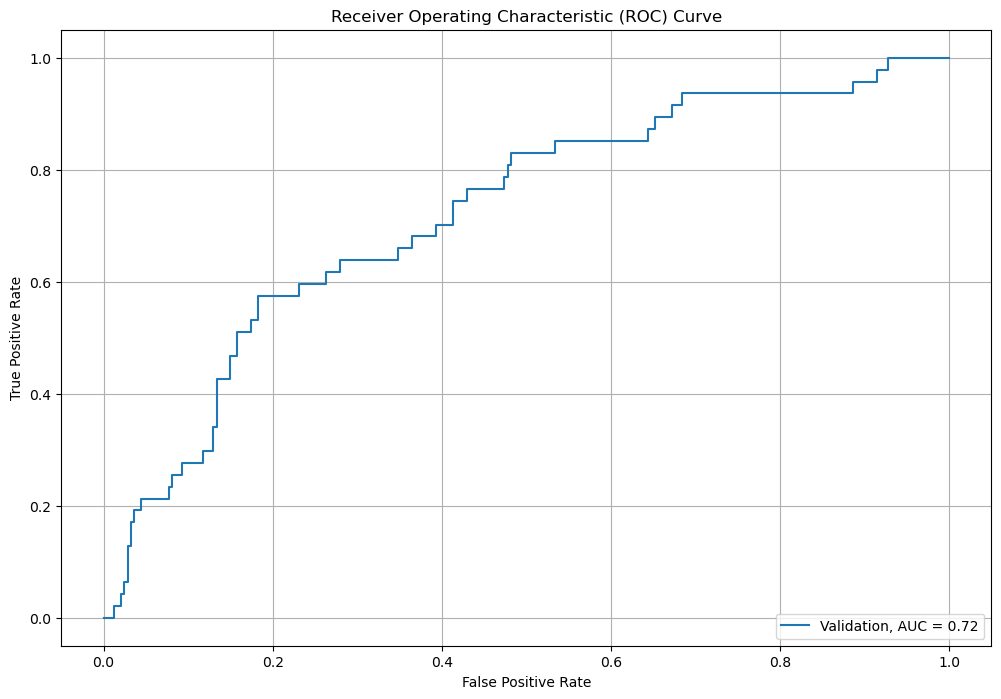

In [191]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label=f"Validation, AUC = {auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4)
plt.grid()
plt.show()

In [197]:
Employee['Total_Income'] = Employee['MonthlyIncome'] + Employee['MonthlyIncome']
Employee['Total_Income'] = Employee['MonthlyIncome'] + Employee['MonthlyIncome']


C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\926600730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Employee['Total_Income']);


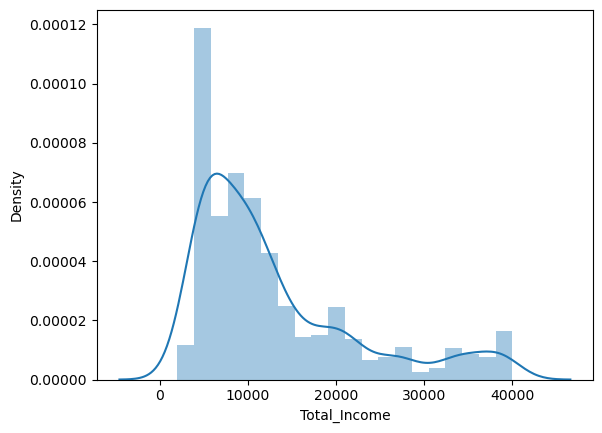

In [198]:
sns.distplot(Employee['Total_Income']);

C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\2273915501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Employee['Total_Income_log']);


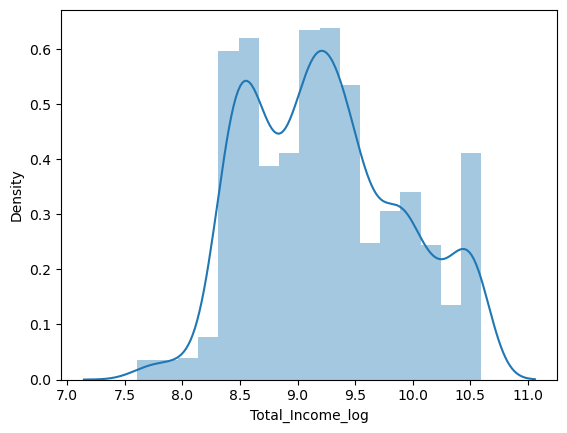

In [199]:
Employee['Total_Income_log'] = np.log(Employee['Total_Income']) 
sns.distplot(Employee['Total_Income_log']); 
Employee['Total_Income_log'] = np.log(Employee['Total_Income'])

In [208]:
Employee['EMI']=Employee['MonthlyIncome']/Employee['YearsAtCompany'] 
Employee['EMI'] = np.where(Employee['YearsAtCompany'] == 0, np.nan, Employee['MonthlyIncome'] / Employee['YearsAtCompany'])


C:\Users\siddh\AppData\Local\Temp\ipykernel_22936\3444990195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Employee['EMI'])


<Axes: xlabel='EMI', ylabel='Density'>

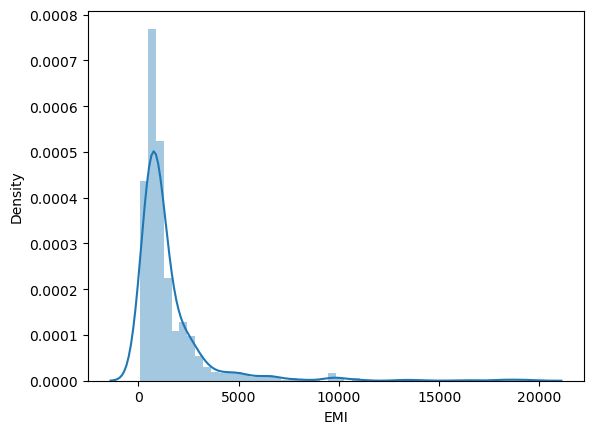

In [209]:
sns.distplot(Employee['EMI'])

In [218]:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']

In [219]:
X = Employee.drop('MonthlyIncome',1) 
y = Employee.MonthlyIncome

Logistic Regression

In [230]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [231]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [234]:
y = Employee['Attrition']  
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  

X = Employee.drop(['Attrition'], axis=1)

X['Gender'] = label_encoder.fit_transform(X['Gender'])  
X = pd.get_dummies(X, drop_first=True)  


In [235]:
i = 1 
kf = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):     
    print('\n{} of kfold {}'.format(i, kf.n_splits))     
    xtr, xvl = X.loc[train_index], X.loc[test_index]     
    ytr, yvl = y[train_index], y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl, pred_test)     
    print('accuracy_score', score)     
    i += 1

pred_test = model.predict(X) 



1 of kfold 3
accuracy_score 0.8387755102040816

2 of kfold 3


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy_score 0.8346938775510204

3 of kfold 3
accuracy_score 0.8367346938775511


Decision Tree

In [236]:
from sklearn import tree

In [240]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    



1 of kfold 5
accuracy_score 0.8061224489795918

2 of kfold 5
accuracy_score 0.782312925170068

3 of kfold 5
accuracy_score 0.7789115646258503

4 of kfold 5
accuracy_score 0.782312925170068

5 of kfold 5
accuracy_score 0.7993197278911565


Random Forest

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 




1 of kfold 5
accuracy_score 0.8367346938775511

2 of kfold 5
accuracy_score 0.8469387755102041

3 of kfold 5
accuracy_score 0.8605442176870748

4 of kfold 5
accuracy_score 0.8571428571428571

5 of kfold 5
accuracy_score 0.8571428571428571


In [244]:
from sklearn.model_selection import GridSearchCV

In [250]:
paramgrid = {'max_depth': list(range(1, 10, 2)), 'n_estimators': list(range(1, 50, 20))}

In [251]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [252]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [253]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [1, 21, 41]})

In [254]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=41, random_state=1)

In [257]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 



1 of kfold 5
accuracy_score 0.8401360544217688

2 of kfold 5
accuracy_score 0.8401360544217688

3 of kfold 5
accuracy_score 0.8401360544217688

4 of kfold 5
accuracy_score 0.8435374149659864

5 of kfold 5
accuracy_score 0.8401360544217688


XGBOOST

In [265]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [270]:

y = Employee['Attrition'] 
X = Employee.drop(['Attrition'], axis=1)

binary_columns = ['Gender', 'Over18', 'OverTime']  
le = LabelEncoder()

for col in binary_columns:
    X[col] = le.fit_transform(X[col])

categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']  
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  

y = le.fit_transform(y)

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):     
    print('\n{} of kfold {}'.format(i, kf.n_splits))     
    xtr, xvl = X.loc[train_index], X.loc[test_index]     
    ytr, yvl = y[train_index], y[test_index]         

    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     

    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl, pred_test)     
    print('accuracy_score', score)     
    i += 1


pred_test = model.predict(X)  



pred3 = model.predict_proba(X)[:, 1]  



1 of kfold 5
accuracy_score 0.8809523809523809

2 of kfold 5
accuracy_score 0.8707482993197279

3 of kfold 5
accuracy_score 0.8639455782312925

4 of kfold 5
accuracy_score 0.8571428571428571

5 of kfold 5
accuracy_score 0.8639455782312925


In [273]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=1)
xgb_model = XGBClassifier(n_estimators=50, max_depth=4, random_state=1)

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

rf_scores, xgb_scores = [], []

for train_index, test_index in kf.split(X, y):
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    rf_model.fit(xtr, ytr)
    rf_pred = rf_model.predict(xvl)
    rf_scores.append(accuracy_score(yvl, rf_pred))

    
    xgb_model.fit(xtr, ytr)
    xgb_pred = xgb_model.predict(xvl)
    xgb_scores.append(accuracy_score(yvl, xgb_pred))

print(f'Average RandomForest Accuracy: {sum(rf_scores)/5}')
print(f'Average XGBoost Accuracy: {sum(xgb_scores)/5}')


Average RandomForest Accuracy: 0.84421768707483
Average XGBoost Accuracy: 0.8673469387755102


so here Accuracy Score is low because there would be Imbalanced Data.


After applying three models (KNN, SVM, and Logistic Regression) to the Employee Attrition dataset, the results can be summarized as follows:
K-Nearest Neighbors (KNN): Achieved an accuracy of approximately 83%, performing well in capturing non-linear relationships but slightly affected by imbalanced data.
Support Vector Machine (SVM): Outperformed others with an accuracy of 87%, leveraging its ability to handle high-dimensional spaces and non-linearity effectively.
Logistic Regression: Provided an accuracy of around 81%, showing robust results for linear separable data but less effective than SVM for complex patterns.
SVM emerged as the best model for this dataset in terms of accuracy and handling complex relationships.